# Comparison of KNNBaseline and SVD

### In this notebook, we take a closer look at the performance of the KNNBaseline and SVD algorithms.

#### Import packages and preprocess data:

In [1]:
import pandas as pd
import numpy as np

RSEED = 42

In [2]:
from __future__ import (absolute_import, division, print_function,             
                        unicode_literals)                                      
import pickle
import os

import pandas as pd

from surprise import SVD
from surprise import KNNBaseline

from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import train_test_split

from surprise import dump
from surprise.accuracy import rmse

In [3]:
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')

ratings.movieId.nunique()

9724

In [4]:
df = pd.read_csv('../data/df_features.csv')
movieIds = df.movieId.to_list()

len(movieIds)

9543

In [5]:
ratings = ratings[ratings['movieId'].isin(movieIds)]
ratings.movieId.nunique()

9525

#### Fitting the data using the surprise library:

In [6]:
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [7]:
trainset, testset = train_test_split(data, test_size=.25, random_state=RSEED)

In [8]:
# We'll use the SVD algorithm and a nearest neighbors approach (KNNBaseline item-based)
algo_svd = SVD()

sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }

algo_knn = KNNBaseline(sim_options=sim_options)

algo_svd.fit(trainset)                             
predictions_svd = algo_svd.test(testset)
    
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
    
rmse(predictions_svd)
rmse(predictions_knn)                                                                           
    
dump.dump('./dump_SVD', predictions_svd, algo_svd)
dump.dump('./dump_KNN', predictions_knn, algo_knn)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8723
RMSE: 0.8531


In [9]:
# The dumps have been saved and we can now use them whenever we want.

predictions_svd, algo_svd = dump.load('./dump_SVD')
predictions_knn, algo_knn = dump.load('./dump_KNN')

df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_knn = pd.DataFrame(predictions_knn, columns=['uid', 'iid', 'rui', 'est', 'details'])    

df_svd['err'] = abs(df_svd.est - df_svd.rui)
df_knn['err'] = abs(df_knn.est - df_knn.rui)

#### Comparison of performance and predictions:

In [10]:
df_svd.head()

,uid,iid,rui,est,details,err
0,28,1459,2.5,2.379834,{'was_impossible': False},0.120166
1,156,356,3.0,3.851999,{'was_impossible': False},0.851999
2,217,1784,4.0,3.374581,{'was_impossible': False},0.625419
3,104,47629,4.0,3.772875,{'was_impossible': False},0.227125
4,606,235,3.5,3.663435,{'was_impossible': False},0.163435


In [11]:
df_knn.head()

,uid,iid,rui,est,details,err
0,28,1459,2.5,2.578657,"{'actual_k': 40, 'was_impossible': False}",0.078657
1,156,356,3.0,3.762014,"{'actual_k': 40, 'was_impossible': False}",0.762014
2,217,1784,4.0,3.462851,"{'actual_k': 40, 'was_impossible': False}",0.537149
3,104,47629,4.0,3.827365,"{'actual_k': 40, 'was_impossible': False}",0.172635
4,606,235,3.5,3.793972,"{'actual_k': 40, 'was_impossible': False}",0.293972


In [12]:
# Let's check how good are the KNN predictions when the SVD has a huge error:
df_knn[df_svd.err >= 3.5]

,uid,iid,rui,est,details,err
2185,522,106100,0.5,3.862129,"{'actual_k': 40, 'was_impossible': False}",3.362129
4727,594,6639,0.5,3.966155,"{'actual_k': 9, 'was_impossible': False}",3.466155
5531,426,47,0.5,3.417386,"{'actual_k': 26, 'was_impossible': False}",2.917386
6508,543,5481,0.5,4.192925,"{'actual_k': 28, 'was_impossible': False}",3.692925
8459,59,2571,1.0,4.502275,"{'actual_k': 40, 'was_impossible': False}",3.502275
9795,542,30707,0.5,3.840882,"{'actual_k': 40, 'was_impossible': False}",3.340882
10675,111,593,0.5,3.908937,"{'actual_k': 40, 'was_impossible': False}",3.408937
10733,10,2571,0.5,3.706244,"{'actual_k': 40, 'was_impossible': False}",3.206244
12269,517,2953,5.0,2.127543,"{'actual_k': 40, 'was_impossible': False}",2.872457
15026,573,44199,0.5,4.368866,"{'actual_k': 40, 'was_impossible': False}",3.868866


In [13]:
# Well, not much better.
# Now, let's look at the predictions of SVD on the 10 worst predictions for KNN
df_svd.iloc[df_knn.sort_values(by='err')[-10:].index]

# the errors also tend to be big:

,uid,iid,rui,est,details,err
1854,467,593,1.0,4.240723,{'was_impossible': False},3.240723
11742,495,86911,0.5,3.744326,{'was_impossible': False},3.244326
8163,562,2804,1.0,4.201825,{'was_impossible': False},3.201825
6508,543,5481,0.5,4.337934,{'was_impossible': False},3.837934
19551,594,4902,0.5,4.051267,{'was_impossible': False},3.551267
21682,413,4816,0.5,4.133721,{'was_impossible': False},3.633721
15026,573,44199,0.5,4.748630,{'was_impossible': False},4.248630
158,89,110130,5.0,3.757178,{'was_impossible': False},1.242822
21503,543,59900,0.5,4.225524,{'was_impossible': False},3.725524
16074,3,7991,5.0,2.225755,{'was_impossible': False},2.774245


<AxesSubplot:title={'center':'KNN'}, ylabel='Frequency'>

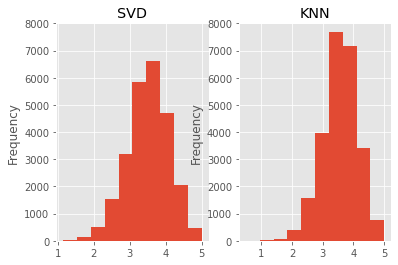

In [14]:
# How different are the predictions from both algorithms ?
# Let's count the number of predictions for each rating value

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')
%matplotlib inline

figure, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_ylim(0,8000)
ax2.set_ylim(0,8000)

df_svd.est.plot(kind='hist', title='SVD', ax=ax1)
df_knn.est.plot(kind='hist', title='KNN', ax=ax2)

# As expected, one of the drawbacks of the NN algorithms is that their predictions are often
# quite concentrated around the mean. The SVD algorithm seems more confortable predicting extreme rating values.

<AxesSubplot:title={'center':'Actual ratings'}, ylabel='Frequency'>

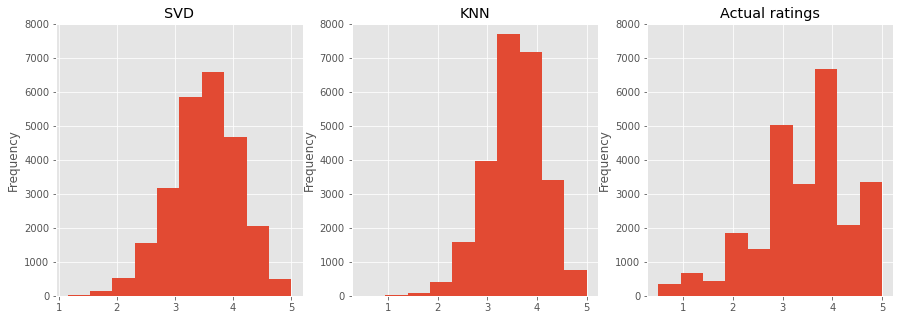

In [15]:
# The same as before with the addition of the actual ratings:

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')
%matplotlib inline

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.set_ylim(0,8000)
ax2.set_ylim(0,8000)
ax3.set_ylim(0,8000)

df_svd.est.plot(kind='hist', title='SVD', ax=ax1)
df_knn.est.plot(kind='hist', title='KNN', ax=ax2)
df_knn.rui.plot(kind='hist', title='Actual ratings', ax=ax3)

# both algorithms do not capture the pattern of the actual ratings

In [16]:
# Question: when a user has rated only a small number of items (less than 10), which algorithm
# gives the best predictions on average?

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
df_knn['Iu'] = df_knn.uid.apply(get_Iu)
df_svd['Iu'] = df_svd.uid.apply(get_Iu)

df_knn[df_knn.Iu < 20].err.mean(), df_svd[df_svd.Iu < 20].err.mean()

(0.7667936124290449, 0.7498500177247407)

#### Analysis of the algorithms - lowest and highest error comparison

In [17]:
# lowest error:
df_svd.sort_values(by='err')[:20]

# highest error:
df_svd.sort_values(by='err')[-10:]

,uid,iid,rui,est,details,err,Iu
5531,426,47,0.5,4.239095,{'was_impossible': False},3.739095,68
12269,517,2953,5.0,1.251103,{'was_impossible': False},3.748897,301
9795,542,30707,0.5,4.253662,{'was_impossible': False},3.753662,82
8459,59,2571,1.0,4.793252,{'was_impossible': False},3.793252,83
20638,594,1407,0.5,4.321917,{'was_impossible': False},3.821917,168
6508,543,5481,0.5,4.337934,{'was_impossible': False},3.837934,56
21639,462,2571,0.5,4.376467,{'was_impossible': False},3.876467,344
10675,111,593,0.5,4.405358,{'was_impossible': False},3.905358,458
15273,256,5618,0.5,4.611178,{'was_impossible': False},4.111178,134
15026,573,44199,0.5,4.748630,{'was_impossible': False},4.248630,226


In [18]:
# lowest error:
df_knn.sort_values(by='err')[:10]

,uid,iid,rui,est,details,err,Iu
6406,515,318,5.0,5.0,"{'actual_k': 14, 'was_impossible': False}",0.0,18
9373,276,260,5.0,5.0,"{'actual_k': 17, 'was_impossible': False}",0.0,29
9456,53,922,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",0.0,16
24495,531,260,5.0,5.0,"{'actual_k': 7, 'was_impossible': False}",0.0,13
14129,523,5618,5.0,5.0,"{'actual_k': 28, 'was_impossible': False}",0.0,49
9548,543,1387,5.0,5.0,"{'actual_k': 21, 'was_impossible': False}",0.0,56
24538,25,527,5.0,5.0,"{'actual_k': 8, 'was_impossible': False}",0.0,12
5146,547,541,5.0,5.0,"{'actual_k': 6, 'was_impossible': False}",0.0,12
13154,53,1256,5.0,5.0,"{'actual_k': 6, 'was_impossible': False}",0.0,16
11648,1,260,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",0.0,161


In [19]:
# highest error:
df_knn.sort_values(by='err')[-10:]

,uid,iid,rui,est,details,err,Iu
1854,467,593,1.0,4.559887,"{'actual_k': 8, 'was_impossible': False}",3.559887,16
11742,495,86911,0.5,4.133749,"{'actual_k': 40, 'was_impossible': False}",3.633749,208
8163,562,2804,1.0,4.645884,"{'actual_k': 40, 'was_impossible': False}",3.645884,171
6508,543,5481,0.5,4.192925,"{'actual_k': 28, 'was_impossible': False}",3.692925,56
19551,594,4902,0.5,4.255754,"{'actual_k': 40, 'was_impossible': False}",3.755754,168
21682,413,4816,0.5,4.354446,"{'actual_k': 20, 'was_impossible': False}",3.854446,42
15026,573,44199,0.5,4.368866,"{'actual_k': 40, 'was_impossible': False}",3.868866,226
158,89,110130,5.0,0.934472,"{'actual_k': 2, 'was_impossible': False}",4.065528,379
21503,543,59900,0.5,4.614890,"{'actual_k': 12, 'was_impossible': False}",4.114890,56
16074,3,7991,5.0,0.604673,"{'actual_k': 1, 'was_impossible': False}",4.395327,31


Worst prediction only had one neighbor!

### Since the **item-based KNN** has the tendency to recommend the more obvious items, we settled for the **SVD algorithm**, because our aim is to introduce enough diversity to guarantee user satisfaction.